In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Load TrackStuck JSON
with open("../data/playback_data/TrackStuck_Hourly.json", "r") as f:
    stuck_data = json.load(f)
df_stuck = pd.DataFrame(stuck_data)

In [3]:
# Convert timestamp to datetime format
df_stuck["timestamp_utc"] = pd.to_datetime(df_stuck["timestamp_utc"])

most frequently stuck tracks

In [4]:
# Count most stuck tracks
stuck_tracks_count = df_stuck["message_track"].value_counts().head(10)

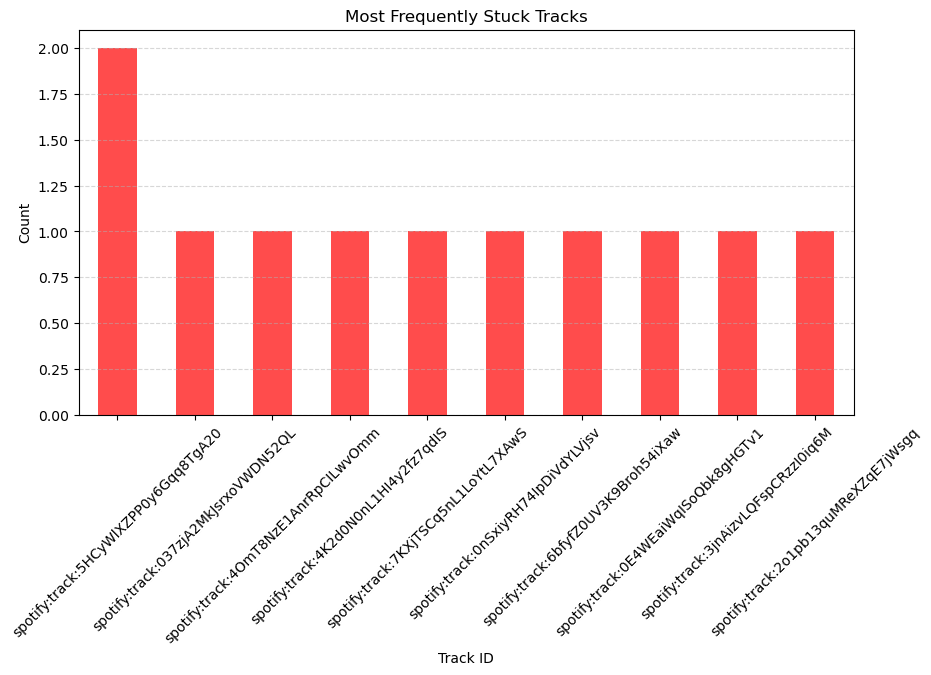

In [5]:
# Plot
plt.figure(figsize=(10, 5))
stuck_tracks_count.plot(kind="bar", color="red", alpha=0.7)
plt.xlabel("Track ID")
plt.ylabel("Count")
plt.title("Most Frequently Stuck Tracks")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

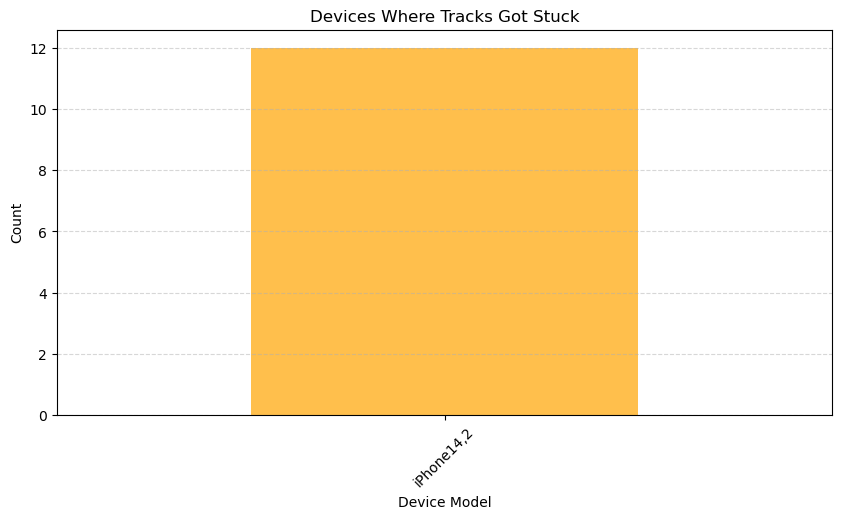

In [6]:
# Count stuck tracks by device model
device_stuck = df_stuck["context_device_model"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
device_stuck.plot(kind="bar", color="orange", alpha=0.7)
plt.xlabel("Device Model")
plt.ylabel("Count")
plt.title("Devices Where Tracks Got Stuck")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

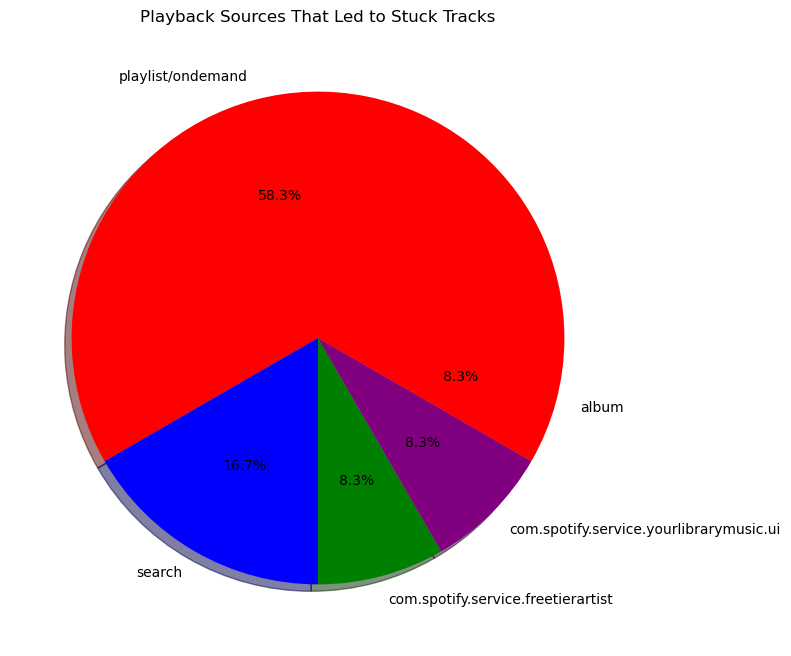

In [7]:
# Count stuck tracks by playback source
source_stuck = df_stuck["message_source_start"].value_counts()

# Plot
plt.figure(figsize=(8, 8))
source_stuck.plot(kind="pie", autopct="%1.1f%%", colors=["red", "blue", "green", "purple"], shadow=True)
plt.title("Playback Sources That Led to Stuck Tracks")
plt.ylabel("")  # Remove default label
plt.show()

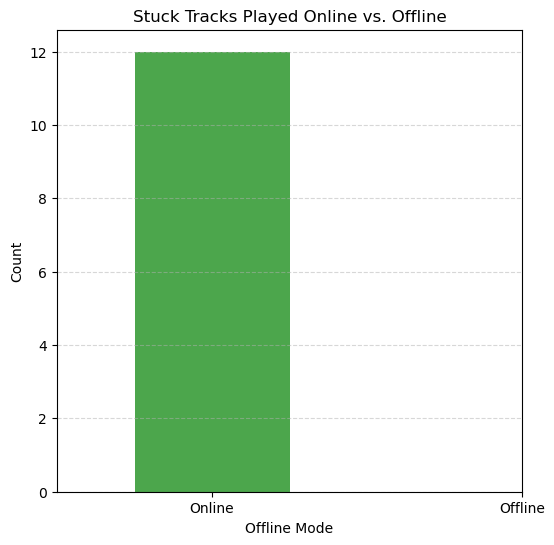

In [8]:
# Count stuck tracks played offline vs. online
offline_stuck = df_stuck["message_offline"].value_counts()

# Plot
plt.figure(figsize=(6, 6))
offline_stuck.plot(kind="bar", color=["green", "darkred"], alpha=0.7)
plt.xlabel("Offline Mode")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Online", "Offline"], rotation=0)
plt.title("Stuck Tracks Played Online vs. Offline")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


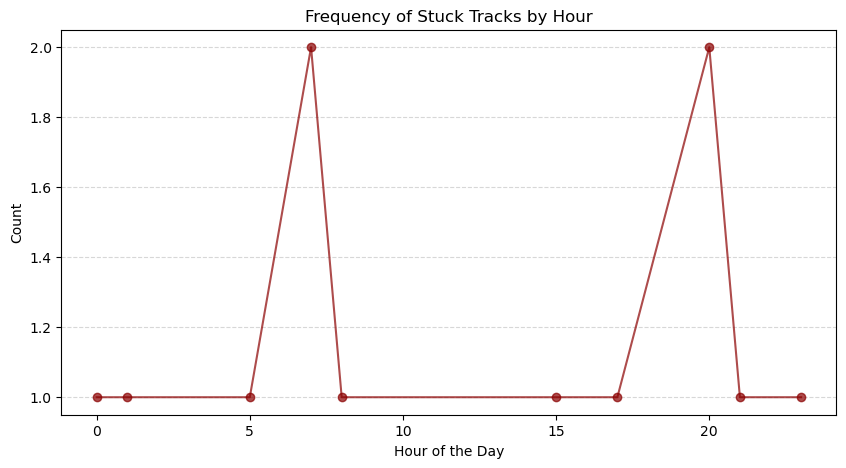

In [10]:
# Extract hour from timestamp
df_stuck["hour"] = df_stuck["timestamp_utc"].dt.hour

# Group by hour
hourly_stuck = df_stuck["hour"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
hourly_stuck.plot(kind="line", marker="o", color="darkred", alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Frequency of Stuck Tracks by Hour")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
